In [1]:
import pandas as pd
import numpy as np
from open_fdd.air_handling_unit.faults.helper_utils import HelperUtils

In [2]:
# Load your data
ahu_data = r"C:\Users\bbartling\Documents\WPCRC_Master.csv"
df = pd.read_csv(ahu_data)

df.head()

,timestamp,HWR_value,HWS_value,Heat_Calls,Oa_Temp,OaTemp_Enable,CWR_Temp,CWS_Temp,CWS_Freeze_SPt,CW_Valve,...,MA_Temp,EffSetpoint,EaDamper,SpaceTemp,RA_CO2,RA_Temp,VAV2_6_SpaceTemp,VAV2_7_SpaceTemp,VAV3_2_SpaceTemp,VAV3_5_SpaceTemp
0,2023-10-01 00:00:00,73.72,73.04,0.0,72.31,65.0,57.65,55.06,5.0,0.0,...,73.92,76.0,0.0,70.83,480.97,73.69,72.1,73.94,66.99,67.23
1,2023-10-01 00:05:00,73.72,73.04,0.0,72.22,65.0,57.75,55.18,5.0,0.0,...,73.92,76.0,0.0,70.83,480.97,73.69,72.1,73.94,66.99,67.23
2,2023-10-01 00:10:00,73.71,73.04,0.0,72.22,65.0,57.75,55.18,5.0,0.0,...,73.97,76.0,0.0,70.82,479.02,73.69,72.1,73.94,66.99,67.23
3,2023-10-01 00:15:00,73.71,73.05,0.0,72.15,65.0,57.85,55.25,5.0,0.0,...,74.01,76.0,0.0,70.82,480.96,73.68,72.1,73.94,66.99,67.23
4,2023-10-01 00:20:00,73.70,73.08,0.0,72.09,65.0,57.95,55.31,5.0,0.0,...,74.01,76.0,0.0,70.80,480.95,73.63,72.1,73.94,66.99,67.23


In [3]:
df.columns

Index(['timestamp', 'HWR_value', 'HWS_value', 'Heat_Calls', 'Oa_Temp',
       'OaTemp_Enable', 'CWR_Temp', 'CWS_Temp', 'CWS_Freeze_SPt', 'CW_Valve',
       'HW_Valve', 'DischargeTemp', 'Eff_DaSP', 'RaHumidity', 'Ra_Temp',
       'Ra_FanSpeed', 'OaTemp', 'Ma_Dampers', 'Ma_Temp', 'SaStaticSPt',
       'Sa_FanSpeed', 'SaTempSP', 'RaCO2', 'SaStatic', 'CurrentKWHrs',
       'CurrentKW', 'Eff_DaSPt', 'RaTemp', 'MaLowSPt', 'MaDampers',
       'SaStatic_SPt', 'SaTempSPt', 'CoolValve', 'OA_Damper', 'MA_Temp',
       'EffSetpoint', 'EaDamper', 'SpaceTemp', 'RA_CO2', 'RA_Temp',
       'VAV2_6_SpaceTemp', 'VAV2_7_SpaceTemp', 'VAV3_2_SpaceTemp',
       'VAV3_5_SpaceTemp'],
      dtype='object')

In [4]:
# Filter the DataFrame
filtered_df = df[(df['Sa_FanSpeed'] > 15.0) & (df['Oa_Temp'] < 10.0)]

# Get the description of the 'OA_Damper' column
oa_damper_description = filtered_df['OA_Damper'].describe()

# Print the description
oa_damper_description

count    3339.000000
mean        9.216119
std         9.964637
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        20.000000
Name: OA_Damper, dtype: float64

In [5]:
# Checking data types of each column
print("Data Types:")
print(df.dtypes)

Data Types:
timestamp            object
HWR_value           float64
HWS_value           float64
Heat_Calls          float64
Oa_Temp             float64
OaTemp_Enable       float64
CWR_Temp            float64
CWS_Temp            float64
CWS_Freeze_SPt      float64
CW_Valve            float64
HW_Valve            float64
DischargeTemp       float64
Eff_DaSP            float64
RaHumidity          float64
Ra_Temp             float64
Ra_FanSpeed         float64
OaTemp              float64
Ma_Dampers          float64
Ma_Temp             float64
SaStaticSPt         float64
Sa_FanSpeed         float64
SaTempSP            float64
RaCO2               float64
SaStatic            float64
CurrentKWHrs        float64
CurrentKW           float64
Eff_DaSPt           float64
RaTemp              float64
MaLowSPt            float64
MaDampers           float64
SaStatic_SPt        float64
SaTempSPt           float64
CoolValve           float64
OA_Damper           float64
MA_Temp             float64
EffSetpo

In [6]:
# Checking max values of each column
print("\nMax Values:")
print(df.max(numeric_only=True))


Max Values:
HWR_value            178.16
HWS_value            180.55
Heat_Calls            15.00
Oa_Temp               98.55
OaTemp_Enable         75.00
CWR_Temp              92.10
CWS_Temp              91.04
CWS_Freeze_SPt         5.00
CW_Valve             100.00
HW_Valve             100.00
DischargeTemp         96.73
Eff_DaSP              63.00
RaHumidity            88.44
Ra_Temp               81.82
Ra_FanSpeed           86.00
OaTemp                98.55
Ma_Dampers           100.00
Ma_Temp               80.38
SaStaticSPt            0.90
Sa_FanSpeed          100.00
SaTempSP              70.00
RaCO2               1321.36
SaStatic               0.87
CurrentKWHrs          15.30
CurrentKW            120.98
Eff_DaSPt             63.00
RaTemp                79.19
MaLowSPt              64.62
MaDampers             50.00
SaStatic_SPt           0.90
SaTempSPt             70.00
CoolValve            100.00
OA_Damper            100.00
MA_Temp               80.73
EffSetpoint           76.00
EaDampe

If you notice above these cols are floats from 0 to 100.0 for the control system analog outputs. Open-fdd expects floats from 0 to 1.0 for percentage of command. Some control system data is 0 - 100.0 and some is 0 - 1.0. If you do pass in a 0 to 100.0 for the control system analog outputs there are checks under the hood that will flag it. 

```python
Sa_FanSpeed          100.00
CW_Valve             100.00
HW_Valve             100.00
Ma_Dampers           100.00
```

In [7]:

percentage_columns = [
    ["Sa_FanSpeed"],
    ["CW_Valve"],
    ["HW_Valve"],
    ["Ma_Dampers"],
]

for col in percentage_columns:
    df[col] = df[col] / 100.0

df.head()

,timestamp,HWR_value,HWS_value,Heat_Calls,Oa_Temp,OaTemp_Enable,CWR_Temp,CWS_Temp,CWS_Freeze_SPt,CW_Valve,...,MA_Temp,EffSetpoint,EaDamper,SpaceTemp,RA_CO2,RA_Temp,VAV2_6_SpaceTemp,VAV2_7_SpaceTemp,VAV3_2_SpaceTemp,VAV3_5_SpaceTemp
0,2023-10-01 00:00:00,73.72,73.04,0.0,72.31,65.0,57.65,55.06,5.0,0.0,...,73.92,76.0,0.0,70.83,480.97,73.69,72.1,73.94,66.99,67.23
1,2023-10-01 00:05:00,73.72,73.04,0.0,72.22,65.0,57.75,55.18,5.0,0.0,...,73.92,76.0,0.0,70.83,480.97,73.69,72.1,73.94,66.99,67.23
2,2023-10-01 00:10:00,73.71,73.04,0.0,72.22,65.0,57.75,55.18,5.0,0.0,...,73.97,76.0,0.0,70.82,479.02,73.69,72.1,73.94,66.99,67.23
3,2023-10-01 00:15:00,73.71,73.05,0.0,72.15,65.0,57.85,55.25,5.0,0.0,...,74.01,76.0,0.0,70.82,480.96,73.68,72.1,73.94,66.99,67.23
4,2023-10-01 00:20:00,73.70,73.08,0.0,72.09,65.0,57.95,55.31,5.0,0.0,...,74.01,76.0,0.0,70.80,480.95,73.63,72.1,73.94,66.99,67.23


In [8]:
# Convert the timestamp column to datetime and set it as the index
df["timestamp"] = pd.to_datetime(df["timestamp"])
df.set_index("timestamp", inplace=True)

df.head()

,HWR_value,HWS_value,Heat_Calls,Oa_Temp,OaTemp_Enable,CWR_Temp,CWS_Temp,CWS_Freeze_SPt,CW_Valve,HW_Valve,...,MA_Temp,EffSetpoint,EaDamper,SpaceTemp,RA_CO2,RA_Temp,VAV2_6_SpaceTemp,VAV2_7_SpaceTemp,VAV3_2_SpaceTemp,VAV3_5_SpaceTemp
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-10-01 00:00:00,73.72,73.04,0.0,72.31,65.0,57.65,55.06,5.0,0.0,0.0,...,73.92,76.0,0.0,70.83,480.97,73.69,72.1,73.94,66.99,67.23
2023-10-01 00:05:00,73.72,73.04,0.0,72.22,65.0,57.75,55.18,5.0,0.0,0.0,...,73.92,76.0,0.0,70.83,480.97,73.69,72.1,73.94,66.99,67.23
2023-10-01 00:10:00,73.71,73.04,0.0,72.22,65.0,57.75,55.18,5.0,0.0,0.0,...,73.97,76.0,0.0,70.82,479.02,73.69,72.1,73.94,66.99,67.23
2023-10-01 00:15:00,73.71,73.05,0.0,72.15,65.0,57.85,55.25,5.0,0.0,0.0,...,74.01,76.0,0.0,70.82,480.96,73.68,72.1,73.94,66.99,67.23
2023-10-01 00:20:00,73.70,73.08,0.0,72.09,65.0,57.95,55.31,5.0,0.0,0.0,...,74.01,76.0,0.0,70.80,480.95,73.63,72.1,73.94,66.99,67.23


In [9]:


# Filter the DataFrame for the month of July
df = df.loc["2024-07"]

#df


Setup the config dict to pass in column names

In [10]:
# Configuration dictionary
config_dict = {
    # used for report name
    'AHU_NAME': "MZVAV_1",

    # timestamp column name
    'INDEX_COL_NAME': "timestamp",

    'DUCT_STATIC_COL': "SaStatic",
    'DUCT_STATIC_SETPOINT_COL': "SaStaticSPt",
    'SUPPLY_VFD_SPEED_COL': "Sa_FanSpeed",
    'MAT_COL': "MA_Temp",
    'OAT_COL': "OaTemp",
    'SAT_COL': "SaTempSP",
    'RAT_COL': "RaTemp",
    'HEATING_SIG_COL': "HW_Valve",  
    'COOLING_SIG_COL': "CW_Valve",  
    'ECONOMIZER_SIG_COL': "Ma_Dampers",
    'SUPPLY_FAN_AIR_VOLUME_COL': None,  # Set to None to potentially skip Fault Condition 6

    'SAT_SETPOINT_COL': "SaTempSPt",
    'CONSTANT_LEAVE_TEMP_SP': False,
    'CONSTANT_LEAVE_TEMP_SP_VAL': 55.0,

    'VFD_SPEED_PERCENT_ERR_THRES': 0.05,
    'VFD_SPEED_PERCENT_MAX': 0.99,
    'DUCT_STATIC_INCHES_ERR_THRES': 0.1,
    'OUTDOOR_DEGF_ERR_THRES': 5.0,
    'MIX_DEGF_ERR_THRES': 5.0,
    'RETURN_DEGF_ERR_THRES': 2.0,
    'SUPPLY_DEGF_ERR_THRES': 2.0,
    'DELTA_T_SUPPLY_FAN': 2.0,

    'DELTA_OS_MAX': 3,
    'AHU_MIN_OA_DPR': 0.20, # Found from the previous summary stats
    'OAT_RAT_DELTA_MIN': 10,
    'AIRFLOW_ERR_THRES': 0.3,
    'AHU_MIN_OA_CFM_DESIGN': 2500,
    'TROUBLESHOOT_MODE': False,
    'ROLLING_WINDOW_SIZE': 10
}

On really large data set this can take a few minutes to run

In [11]:
helper_utils = HelperUtils()
df_combined, df_fc4 = helper_utils.process_all_faults(df, config_dict)

FaultConditionOne done
Duct static pressure too low with fan operating near 100 speed
fault sum: 0
FaultConditionTwo done
Mix temperature too low; should be between outside and return air
fault sum: 0
FaultConditionThree done
Mix temperature too high; should be between outside and return air
fault sum: 0
The program is in FC4 and resampling the data to compute AHU OS state changes per hour takes a while to run...


c:\Users\bbartling\AppData\Local\Programs\Python\Python312\Lib\site-packages\open_fdd\air_handling_unit\faults\shared_utils.py:60: FutureWarning: 'T' is deprecated and will be removed in a future version. Please use 'min' instead of 'T'.
  if median_diff > pd.Timedelta(freq):


FaultConditionFour done
PID hunting; too many operating state changes between AHU modes for heating, economizer, and mechanical cooling
fault sum: 15
FaultConditionFive done
Supply air temperature too low should be higher than mix air
fault sum: 0
FaultConditionSeven done
Supply air temperature too low in full heating
fault sum: 0
FaultConditionEight done
Supply air temperature and mix air temperature should be approx equal in economizer mode
fault sum: 16
FaultConditionNine done
Outside air temperature too high in free cooling without additional mechanical cooling in economizer mode
fault sum: 0
FaultConditionTen done
Outdoor air temperature and mix air temperature should be approx equal in economizer plus mech cooling mode
fault sum: 126
FaultConditionEleven done
Outside air temperature too low for 100 outdoor air cooling in economizer cooling mode
fault sum: 0
FaultConditionTwelve done
Supply air temperature too high; should be less than mix air temperature in economizer plus mech c

In [12]:
df_fc4.columns

Index(['HWR_value', 'HWS_value', 'Heat_Calls', 'Oa_Temp', 'OaTemp_Enable',
       'CWR_Temp', 'CWS_Temp', 'CWS_Freeze_SPt', 'CW_Valve', 'HW_Valve',
       'DischargeTemp', 'Eff_DaSP', 'RaHumidity', 'Ra_Temp', 'Ra_FanSpeed',
       'OaTemp', 'Ma_Dampers', 'Ma_Temp', 'SaStaticSPt', 'Sa_FanSpeed',
       'SaTempSP', 'RaCO2', 'SaStatic', 'CurrentKWHrs', 'CurrentKW',
       'Eff_DaSPt', 'RaTemp', 'MaLowSPt', 'MaDampers', 'SaStatic_SPt',
       'SaTempSPt', 'CoolValve', 'OA_Damper', 'MA_Temp', 'EffSetpoint',
       'EaDamper', 'SpaceTemp', 'RA_CO2', 'RA_Temp', 'VAV2_6_SpaceTemp',
       'VAV2_7_SpaceTemp', 'VAV3_2_SpaceTemp', 'VAV3_5_SpaceTemp',
       'static_check_', 'fan_check_', 'combined_check', 'fc1_flag',
       'mat_check', 'temp_min_check', 'fc2_flag', 'fc3_flag', 'heating_mode',
       'econ_only_cooling_mode', 'econ_plus_mech_cooling_mode',
       'mech_cooling_only_mode', 'fc4_flag'],
      dtype='object')

In [13]:
df_combined.columns

Index(['HWR_value', 'HWS_value', 'Heat_Calls', 'Oa_Temp', 'OaTemp_Enable',
       'CWR_Temp', 'CWS_Temp', 'CWS_Freeze_SPt', 'CW_Valve', 'HW_Valve',
       'DischargeTemp', 'Eff_DaSP', 'RaHumidity', 'Ra_Temp', 'Ra_FanSpeed',
       'OaTemp', 'Ma_Dampers', 'Ma_Temp', 'SaStaticSPt', 'Sa_FanSpeed',
       'SaTempSP', 'RaCO2', 'SaStatic', 'CurrentKWHrs', 'CurrentKW',
       'Eff_DaSPt', 'RaTemp', 'MaLowSPt', 'MaDampers', 'SaStatic_SPt',
       'SaTempSPt', 'CoolValve', 'OA_Damper', 'MA_Temp', 'EffSetpoint',
       'EaDamper', 'SpaceTemp', 'RA_CO2', 'RA_Temp', 'VAV2_6_SpaceTemp',
       'VAV2_7_SpaceTemp', 'VAV3_2_SpaceTemp', 'VAV3_5_SpaceTemp',
       'static_check_', 'fan_check_', 'combined_check', 'fc1_flag',
       'mat_check', 'temp_min_check', 'fc2_flag', 'fc3_flag', 'heating_mode',
       'econ_only_cooling_mode', 'econ_plus_mech_cooling_mode',
       'mech_cooling_only_mode', 'sat_check', 'fc5_flag', 'fc7_flag',
       'sat_fan_mat', 'sat_mat_sqrted', 'fc8_flag', 'oat_minus_oaterror'

Fault Condition 3: Mix temperature too high; should be between outside and return air


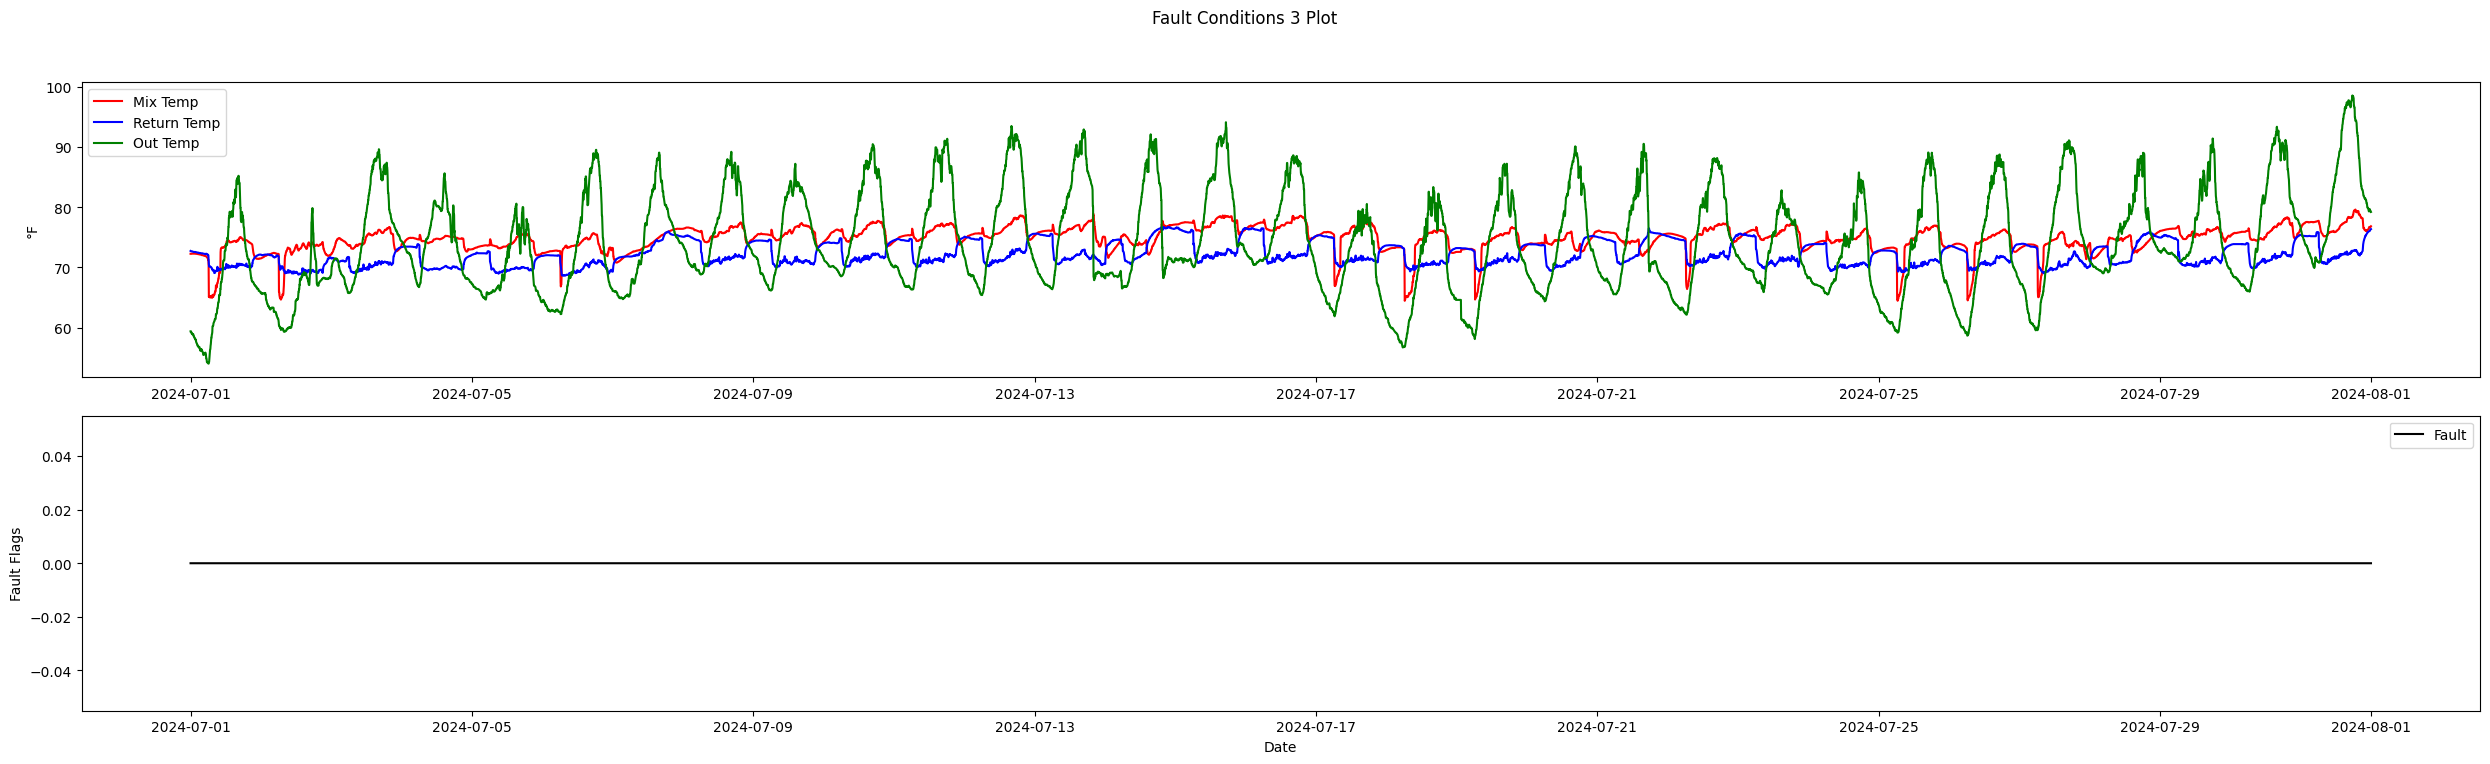

SUMMARY:  {'total_days': 31.0, 'total_hours': 743.92, 'hours_fault_mode': 0.0, 'percent_true': 0.0, 'percent_false': 100.0, 'hours_motor_runtime': 434.5}
{'total_days': 31.0, 'total_hours': 743.92, 'hours_fault_mode': 0.0, 'percent_true': 0.0, 'percent_false': 100.0, 'hours_motor_runtime': 434.5}
flag_count:  0


In [14]:
from open_fdd.air_handling_unit.reports.report_fc3 import FaultCodeThreeReport

# Create an instance of FaultCodeFourReport
fc3_report = FaultCodeThreeReport(config_dict)
fc3_report.display_report_in_ipython(df_combined)


Fault Condition 4: Hunting too many OS state changes


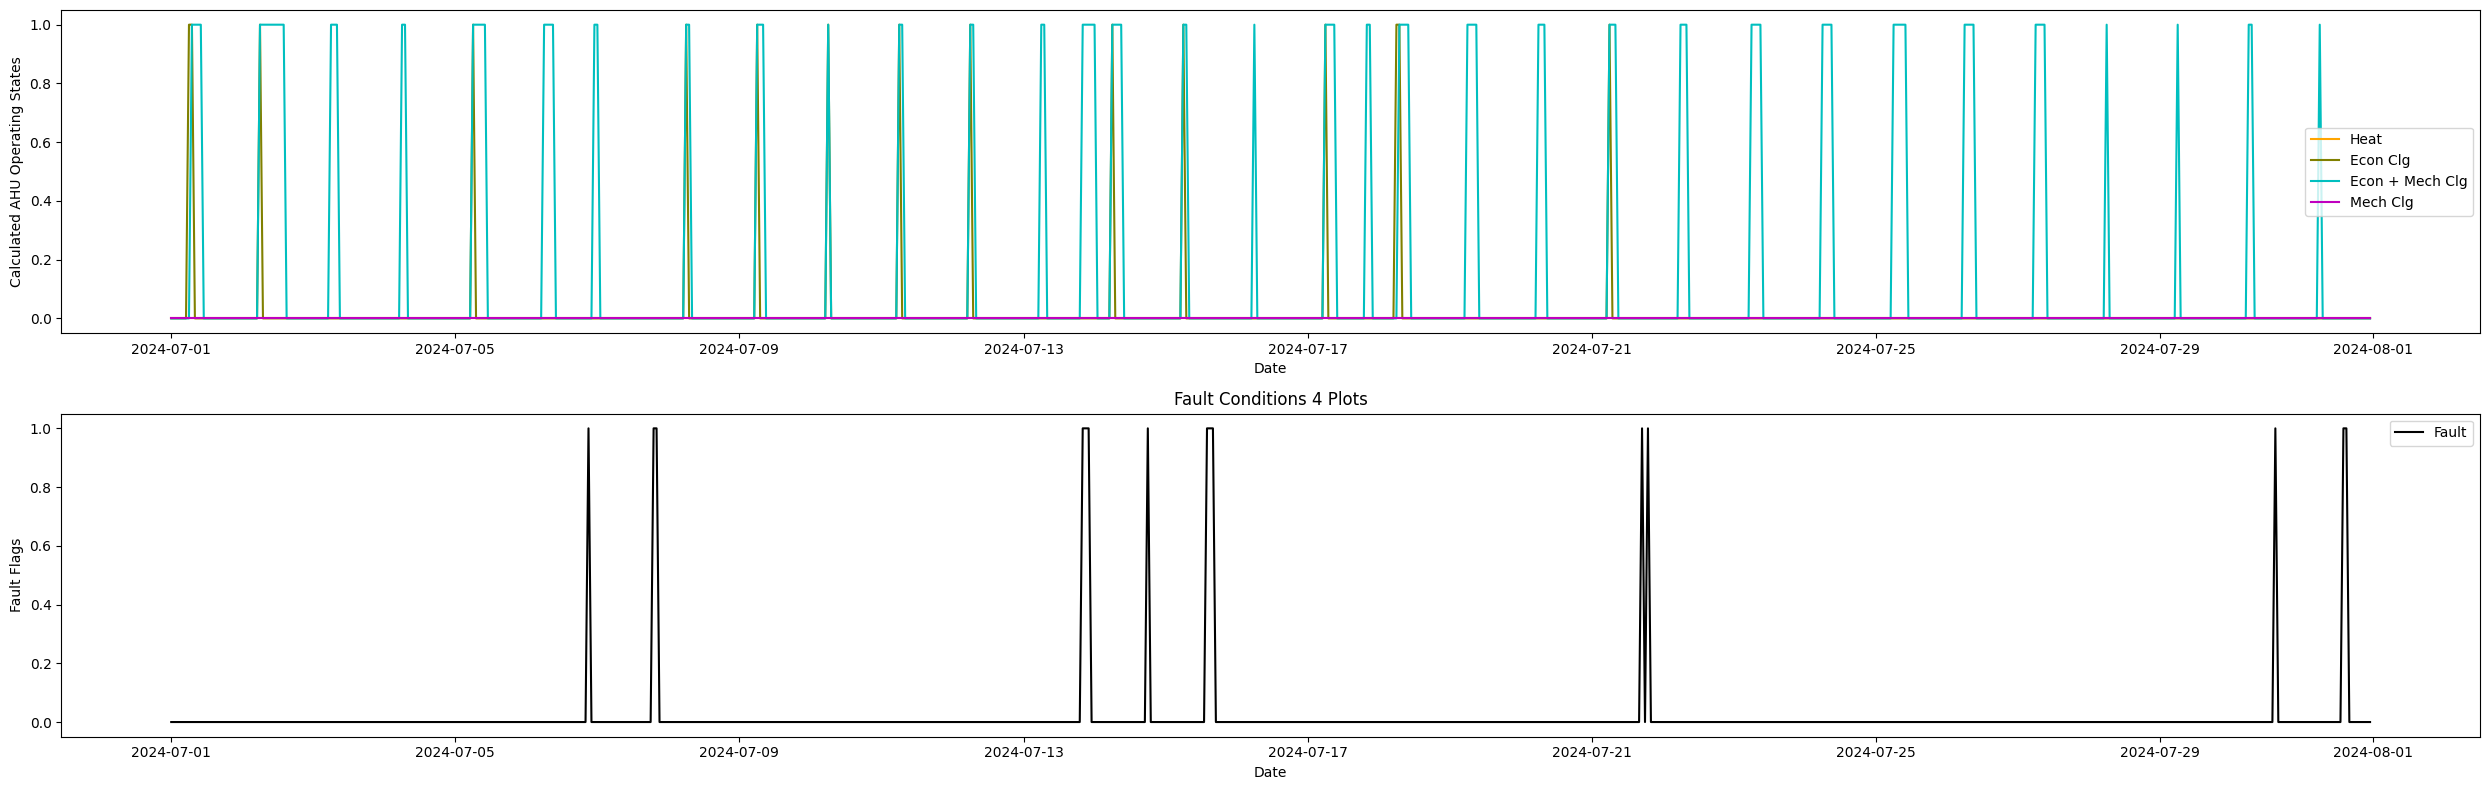

{'total_days_all_data': 30.96, 'total_hours_all_data': 743.0, 'hours_fc4_mode': 15.0, 'percent_true_fc4': 2.02, 'percent_false_fc4': 97.98, 'percent_clg': 0.0, 'percent_econ_clg': 13.71, 'percent_econ': 2.02, 'percent_heating': 0.0, 'total_hours_heating': 0.0, 'total_hours_econ': 15.0, 'total_hours_econ_clg': 102.0, 'total_hours_clg': 0.0}
flag_count:  1
Time-of-day Histogram Plots
timestamp
2024-07-01 00:00:00   NaN
2024-07-01 01:00:00   NaN
2024-07-01 02:00:00   NaN
2024-07-01 03:00:00   NaN
2024-07-01 04:00:00   NaN
                       ..
2024-07-31 19:00:00   NaN
2024-07-31 20:00:00   NaN
2024-07-31 21:00:00   NaN
2024-07-31 22:00:00   NaN
2024-07-31 23:00:00   NaN
Freq: 60min, Name: hour_of_the_day, Length: 744, dtype: float64


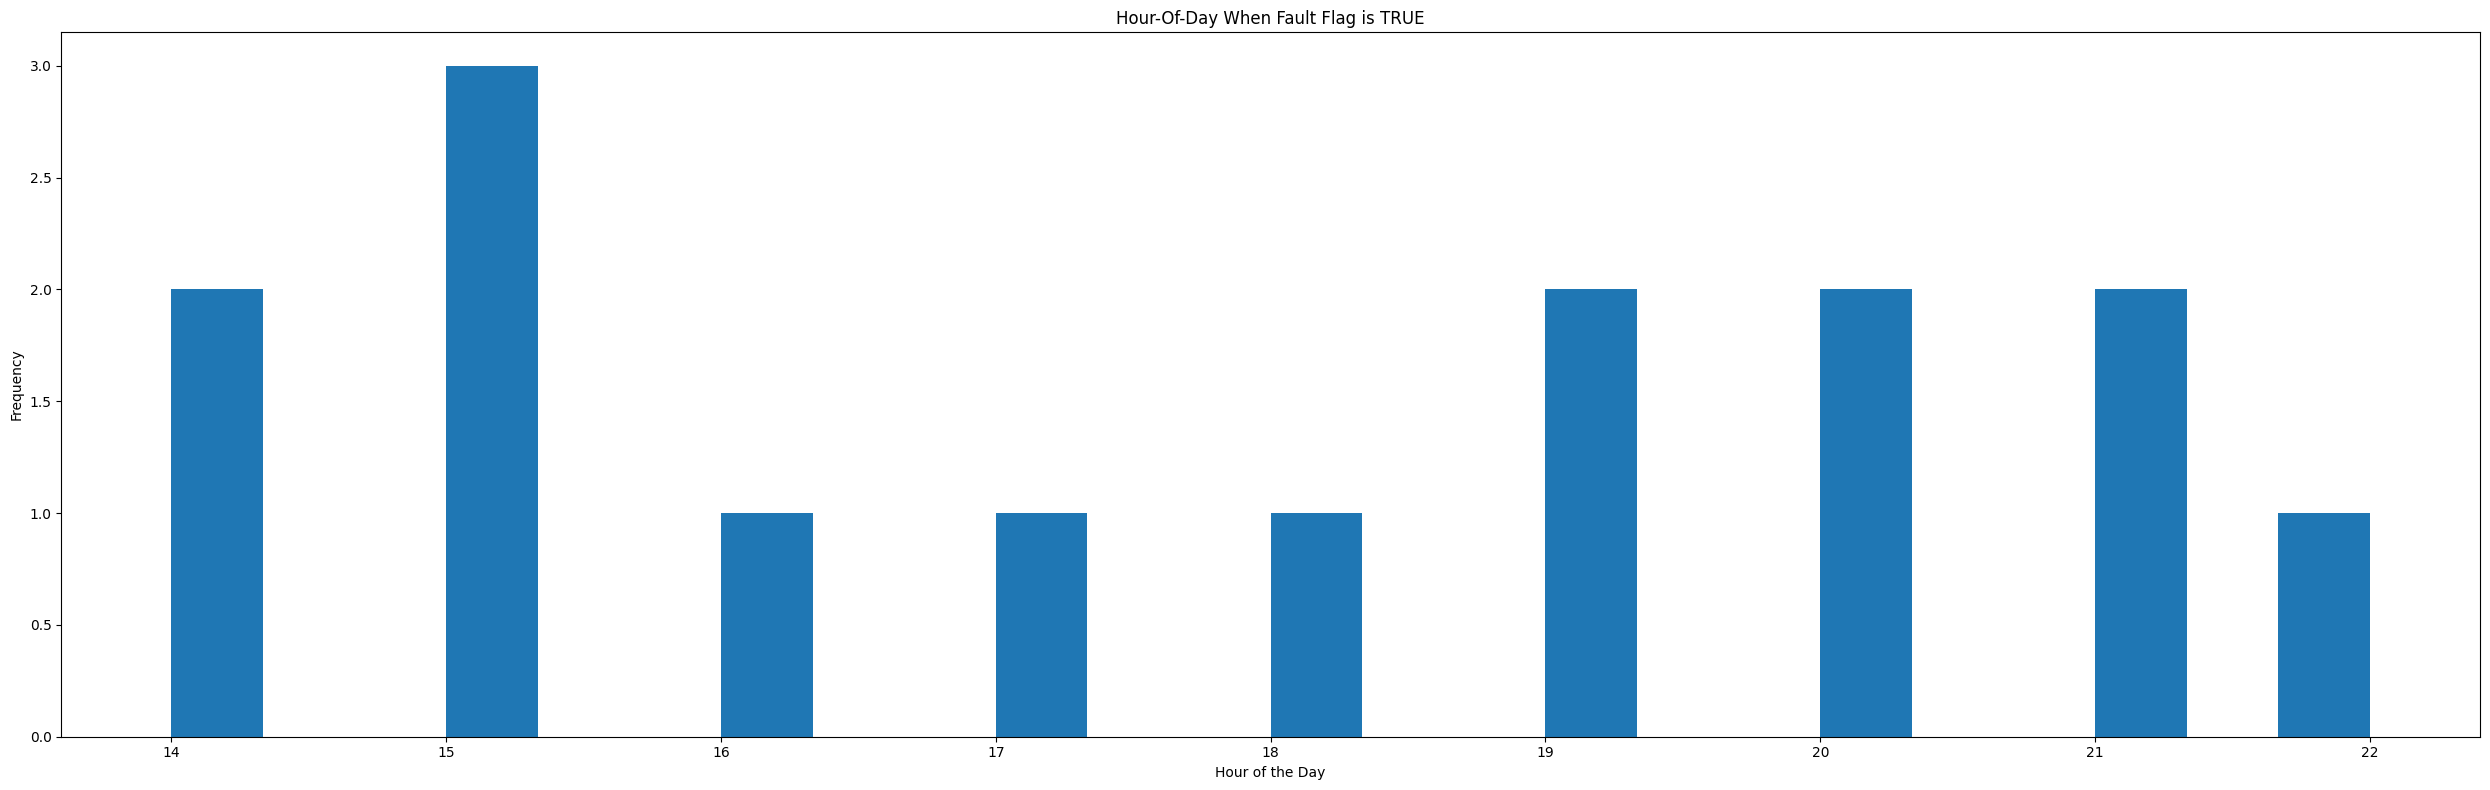

In [15]:

from open_fdd.air_handling_unit.reports.report_fc4 import FaultCodeFourReport

# Create an instance of FaultCodeFourReport
fc4_report = FaultCodeFourReport(config_dict)
fc4_report.display_report_in_ipython(df_fc4)

<Axes: xlabel='timestamp'>

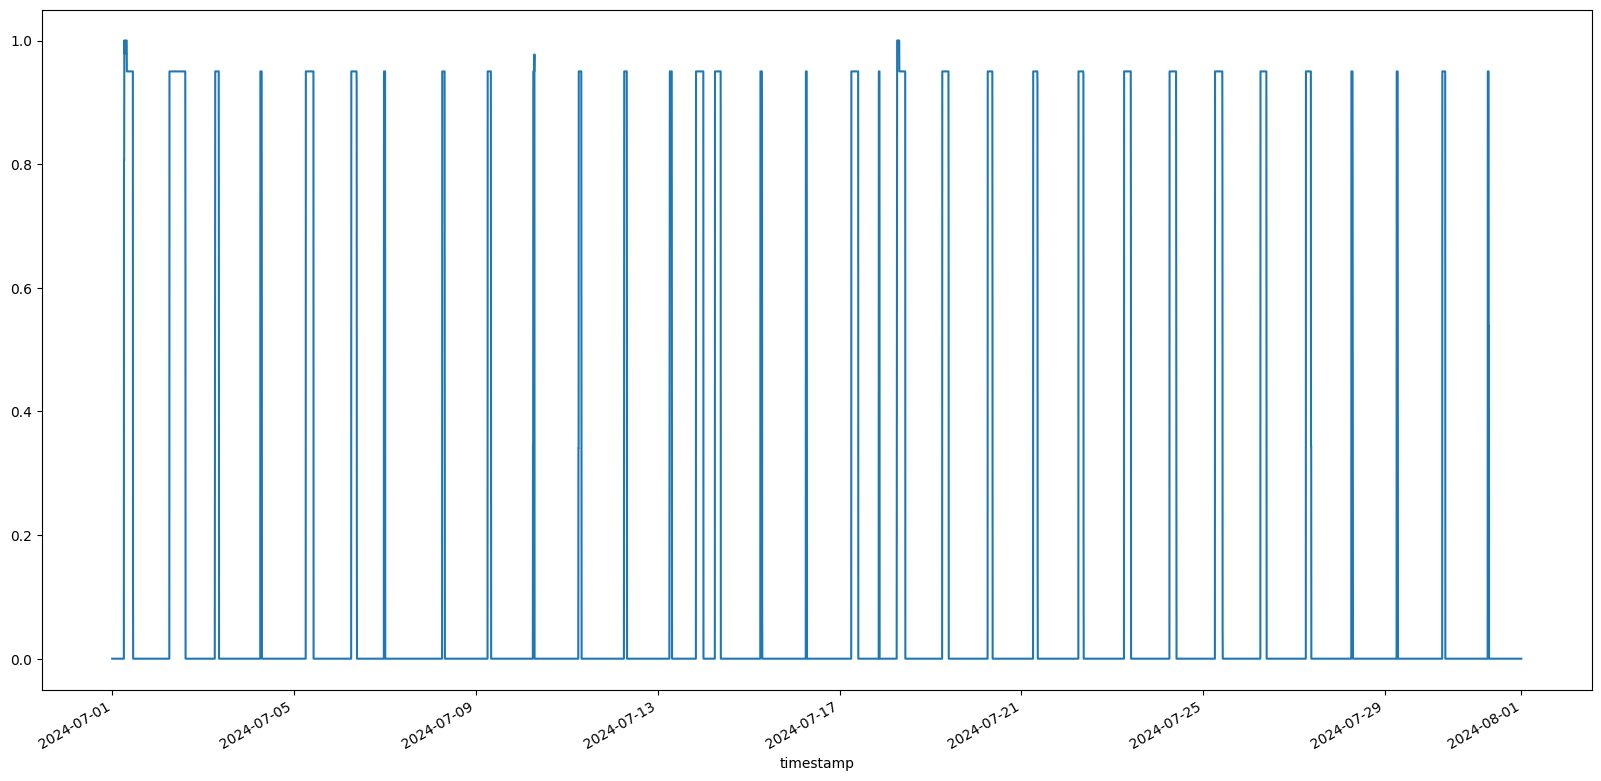

In [16]:
df_combined['Ma_Dampers'].plot(figsize=(20, 10))

In [17]:
import pandas as pd
import matplotlib.pyplot as plt


# Ensure the DataFrame index is in DateTime format
df_combined.index = pd.to_datetime(df_combined.index)

# Select three random days in January 2024
random_days = pd.date_range(start='2024-01-01', end='2024-01-31', freq='D')
random_days = np.random.choice(random_days, 3, replace=False)


for day in random_days:
    # Plot the 'Ma_Dampers' column for each of the three random days
    plt.figure(figsize=(20, 10))

    day = pd.Timestamp(day)  # Convert numpy.datetime64 to pandas Timestamp
    day_str = day.strftime('%Y-%m-%d')
    df_specific_day = df_combined.loc[day_str]
    plt.plot(df_specific_day.index, df_specific_day['Ma_Dampers'], label=day_str)

    # Set plot title and labels
    plt.title('Ma Dampers on Three Random Days in January 2024')
    plt.xlabel('Time')
    plt.ylabel('Ma Dampers')
    plt.legend()

    # Show the plot
    plt.show()


KeyError: '2024-01-19'

<Figure size 2000x1000 with 0 Axes>